In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Results folder:
ResultsFolder = "C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\"

In [2]:
load_folder = 'C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\\Data\\'
peakLoad = pd.read_excel(load_folder + 'Peakload.xlsx')
load = pd.read_excel(load_folder + 'load.xlsx')
load = load.sort_values(by=['building id'])
load = load.reset_index()
load = load.drop(['index'], axis=1)
peakLoad['Load'] = load['Load']
peakLoad['Load Factor'] = peakLoad['Load']/(peakLoad['Peak Load']*8760)
peakLoad = peakLoad.drop(['Unnamed: 0'], axis=1)

peakLoad['MgSO4 Salt Mass E'] = peakLoad['Peak Load']/0.75
peakLoad['MgSO4 Salt Mass P'] = peakLoad['Peak Load']/0.281267306
peakLoad['MgSO4 Salt Mass'] = peakLoad[['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgSO4 Salt Mass P', 'MgSO4 Salt Mass E'], axis=1)

peakLoad['MgCl2 Salt Mass E'] = peakLoad['Peak Load']/0.193056
peakLoad['MgCl2 Salt Mass P'] = peakLoad['Peak Load']/0.084767892
peakLoad['MgCl2 Salt Mass'] = peakLoad[['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['MgCl2 Salt Mass P', 'MgCl2 Salt Mass E'], axis=1)

peakLoad['K2CO3 Salt Mass E'] = peakLoad['Peak Load']/0.186111
peakLoad['K2CO3 Salt Mass P'] = peakLoad['Peak Load']/1.646738256
peakLoad['K2CO3 Salt Mass'] = peakLoad[['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['K2CO3 Salt Mass P', 'K2CO3 Salt Mass E'], axis=1)

peakLoad['SrBr2 Salt Mass E'] = peakLoad['Peak Load']/0.3556
peakLoad['SrBr2 Salt Mass P'] = peakLoad['Peak Load']/0.811253581
peakLoad['SrBr2 Salt Mass'] = peakLoad[['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E']].max(axis=1)
peakLoad = peakLoad.drop(['SrBr2 Salt Mass P', 'SrBr2 Salt Mass E'], axis=1)

peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389


In [3]:
rate = 'Fixed_Rate'
size = 'Opt_Size'

In [4]:
# TES Operation:
tes_MgSO4 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
tes_MgCl2 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
tes_K2CO3 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
tes_SrBr2 = pd.read_excel(ResultsFolder + 'tes_discharge_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
tes_MgSO4 = tes_MgSO4.sort_values(by=['building id'])
tes_MgSO4 = tes_MgSO4.reset_index()
tes_MgSO4 = tes_MgSO4[['building id', 'TES discharge', 'TES SOC']]

tes_MgCl2 = tes_MgCl2.sort_values(by=['building id'])
tes_MgCl2 = tes_MgCl2.reset_index()
tes_MgCl2 = tes_MgCl2[['building id', 'TES discharge', 'TES SOC']]

tes_K2CO3 = tes_K2CO3.sort_values(by=['building id'])
tes_K2CO3 = tes_K2CO3.reset_index()
tes_K2CO3 = tes_K2CO3[['building id', 'TES discharge', 'TES SOC']]

tes_SrBr2 = tes_SrBr2.sort_values(by=['building id'])
tes_SrBr2 = tes_SrBr2.reset_index()
tes_SrBr2 = tes_SrBr2[['building id', 'TES discharge', 'TES SOC']]

# Find changes in total costs:
peakLoad['TES discharge - MgSO4'] = tes_MgSO4['TES discharge']
peakLoad['TES discharge - MgCl2'] = tes_MgCl2['TES discharge']
peakLoad['TES discharge - K2CO3'] = tes_K2CO3['TES discharge']
peakLoad['TES discharge - SrBr2'] = tes_SrBr2['TES discharge']
peakLoad

,building id,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,TES discharge - MgSO4,TES discharge - MgCl2,TES discharge - K2CO3,TES discharge - SrBr2
0,1,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495,13639.887133,12451.326405,6884.049539,6888.673386
1,2,20.164945,41411.346548,0.234433,71.693170,237.884232,108.349022,56.706819,9997.586718,9126.296233,5091.535685,5075.150668
2,3,18.771555,36953.435376,0.224725,66.739200,221.446522,100.862146,52.788400,9240.401047,8479.546229,4756.371388,4747.870848
3,4,16.617412,31673.736508,0.217586,59.080496,196.034272,89.287640,46.730630,8130.013091,7455.520301,4213.916513,4221.871563
4,5,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953,13596.154353,12385.083337,6762.027561,6774.652606
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.189566,23415.204886,0.219283,43.338012,143.799328,65.496214,34.278869,5726.004491,5208.646772,2861.423612,2862.854849
396,397,12.662940,24918.728631,0.224640,45.021018,149.383689,68.039720,35.610069,5693.821739,5164.948344,2859.599030,2850.216753
397,398,4.833286,7854.976581,0.185523,17.183958,57.017881,25.969908,13.591917,2012.568627,1837.118826,1034.488170,1032.321656
398,399,14.577960,28841.437895,0.225848,51.829559,171.975025,78.329386,40.995389,6925.639892,6296.416142,3461.788996,3455.995144


In [5]:
# Total costs:
cost_noTES = pd.read_excel(ResultsFolder + 'costs_noTES_' + rate +'.xlsx')
cost_MgSO4 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgSO4'+'.xlsx')
cost_MgCl2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_MgCl2'+'.xlsx')
cost_K2CO3 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_K2CO3'+'.xlsx')
cost_SrBr2 = pd.read_excel(ResultsFolder + 'costs_salt_' + rate + '_' + size + '_SrBr2'+'.xlsx')

# Clean up:
cost_noTES = cost_noTES.rename(columns={'Unnamed: 0': 'building id'})
cost_noTES = cost_noTES.sort_values(by=['building id'])
cost_noTES = cost_noTES.reset_index()
cost_noTES = cost_noTES[['building id', 'total cost ($)']]

cost_MgSO4 = cost_MgSO4.rename(columns={'Unnamed: 0': 'building id'})
cost_MgSO4 = cost_MgSO4.sort_values(by=['building id'])
cost_MgSO4 = cost_MgSO4.reset_index()
cost_MgSO4 = cost_MgSO4[['building id', 'total cost ($)']]

cost_MgCl2 = cost_MgCl2.rename(columns={'Unnamed: 0': 'building id'})
cost_MgCl2 = cost_MgCl2.sort_values(by=['building id'])
cost_MgCl2 = cost_MgCl2.reset_index()
cost_MgCl2 = cost_MgCl2[['building id', 'total cost ($)']]

cost_K2CO3 = cost_K2CO3.rename(columns={'Unnamed: 0': 'building id'})
cost_K2CO3 = cost_K2CO3.sort_values(by=['building id'])
cost_K2CO3 = cost_K2CO3.reset_index()
cost_K2CO3 = cost_K2CO3[['building id', 'total cost ($)']]

cost_SrBr2 = cost_SrBr2.rename(columns={'Unnamed: 0': 'building id'})
cost_SrBr2 = cost_SrBr2.sort_values(by=['building id'])
cost_SrBr2 = cost_SrBr2.reset_index()
cost_SrBr2 = cost_SrBr2[['building id', 'total cost ($)']]

# Find changes in total costs:
cost_impacts_TES = pd.DataFrame()
cost_impacts_TES['building id'] = cost_noTES['building id']
cost_impacts_TES['total cost - no TES'] = cost_noTES['total cost ($)']
cost_impacts_TES['total cost - MgSO4'] = cost_MgSO4['total cost ($)']
cost_impacts_TES['total cost - MgCl2'] = cost_MgCl2['total cost ($)']
cost_impacts_TES['total cost - K2CO3'] = cost_K2CO3['total cost ($)']
cost_impacts_TES['total cost - SrBr2'] = cost_SrBr2['total cost ($)']

cost_impacts_TES['cost saving - MgSO4'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgSO4']
cost_impacts_TES['cost saving % - MgSO4'] = cost_impacts_TES['cost saving - MgSO4']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - MgCl2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - MgCl2']
cost_impacts_TES['cost saving % - MgCl2'] = cost_impacts_TES['cost saving - MgCl2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - K2CO3'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - K2CO3']
cost_impacts_TES['cost saving % - K2CO3'] = cost_impacts_TES['cost saving - K2CO3']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES['cost saving - SrBr2'] = cost_impacts_TES['total cost - no TES'] - cost_impacts_TES['total cost - SrBr2']
cost_impacts_TES['cost saving % - SrBr2'] = cost_impacts_TES['cost saving - SrBr2']/cost_impacts_TES['total cost - no TES']
cost_impacts_TES
#cost_impacts_TES.to_excel("C:\\Users\\atpha\\Documents\\Postdocs\\Projects\\TES\Results\\Detroit\\Compiled\\cost_saving.xlsx")

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,cost saving - K2CO3,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2
0,1,3514.231069,3397.788957,3407.427665,3454.690523,3454.556691,116.442112,0.033134,106.803404,0.030392,59.540546,0.016943,59.674378,0.016981
1,2,2511.596303,2427.997034,2434.907634,2467.711441,2467.848893,83.599269,0.033285,76.688669,0.030534,43.884862,0.017473,43.747410,0.017418
2,3,2237.074823,2159.916483,2166.325176,2196.708758,2196.807964,77.158339,0.034491,70.749647,0.031626,40.366064,0.018044,40.266859,0.018000
3,4,1925.335907,1856.972052,1862.524736,1889.469726,1889.543327,68.363855,0.035507,62.811171,0.032623,35.866181,0.018629,35.792580,0.018590
4,5,3573.233625,3458.179200,3467.727378,3514.172435,3514.058430,115.054425,0.032199,105.506247,0.029527,59.061190,0.016529,59.175194,0.016561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1434.170366,1383.047847,1387.317199,1407.990694,1407.958929,51.122519,0.035646,46.853166,0.032669,26.179672,0.018254,26.211437,0.018276
396,397,1533.937770,1484.003409,1488.270021,1507.921092,1508.049802,49.934362,0.032553,45.667750,0.029772,26.016678,0.016961,25.887968,0.016877
397,398,490.001956,471.713179,473.245298,480.435997,480.453582,18.288777,0.037324,16.756658,0.034197,9.565959,0.019522,9.548374,0.019486
398,399,1759.523207,1699.709299,1704.603963,1728.414000,1728.499039,59.813908,0.033994,54.919244,0.031213,31.109207,0.017680,31.024169,0.017632


In [6]:
# Calc total cost saving saving due to TES:
tot_cost_noTES = cost_impacts_TES['total cost - no TES'].sum()*10000
diff_all_cost_MgSO4 = cost_impacts_TES["cost saving - MgSO4"].sum()*10000
diff_all_cost_MgCl2 = cost_impacts_TES["cost saving - MgCl2"].sum()*10000
diff_all_cost_K2CO3 = cost_impacts_TES["cost saving - K2CO3"].sum()*10000
diff_all_cost_SrBr2 = cost_impacts_TES["cost saving - SrBr2"].sum()*10000

pct_cost_saving_MgSO4 = diff_all_cost_MgSO4/tot_cost_noTES
pct_cost_saving_MgCl2 = diff_all_cost_MgCl2/tot_cost_noTES
pct_cost_saving_K2CO3 = diff_all_cost_K2CO3/tot_cost_noTES
pct_cost_saving_SrBr2 = diff_all_cost_SrBr2/tot_cost_noTES

cost_impacts_TES = pd.merge(cost_impacts_TES, peakLoad, on=["building id"])
cost_impacts_TES['e - MgSO4'] = cost_impacts_TES['MgSO4 Salt Mass']*0.75
cost_impacts_TES['CF - MgSO4'] = cost_impacts_TES['TES discharge - MgSO4']*100/(cost_impacts_TES['e - MgSO4']*8760)
#cost_impacts_TES["cost saving %"] = cost_impacts_TES["cost saving %"]*3.9
cost_impacts_TES

,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,cost saving % - MgCl2,...,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,TES discharge - MgSO4,TES discharge - MgCl2,TES discharge - K2CO3,TES discharge - SrBr2,e - MgSO4,CF - MgSO4
0,1,3514.231069,3397.788957,3407.427665,3454.690523,3454.556691,116.442112,0.033134,106.803404,0.030392,...,98.568777,327.059854,148.965802,77.964495,13639.887133,12451.326405,6884.049539,6888.673386,73.926583,2.106231
1,2,2511.596303,2427.997034,2434.907634,2467.711441,2467.848893,83.599269,0.033285,76.688669,0.030534,...,71.693170,237.884232,108.349022,56.706819,9997.586718,9126.296233,5091.535685,5075.150668,53.769878,2.122521
2,3,2237.074823,2159.916483,2166.325176,2196.708758,2196.807964,77.158339,0.034491,70.749647,0.031626,...,66.739200,221.446522,100.862146,52.788400,9240.401047,8479.546229,4756.371388,4747.870848,50.054400,2.107388
3,4,1925.335907,1856.972052,1862.524736,1889.469726,1889.543327,68.363855,0.035507,62.811171,0.032623,...,59.080496,196.034272,89.287640,46.730630,8130.013091,7455.520301,4213.916513,4221.871563,44.310372,2.094507
4,5,3573.233625,3458.179200,3467.727378,3514.172435,3514.058430,115.054425,0.032199,105.506247,0.029527,...,99.201496,329.159269,149.922022,78.464953,13596.154353,12385.083337,6762.027561,6774.652606,74.401122,2.086087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,1434.170366,1383.047847,1387.317199,1407.990694,1407.958929,51.122519,0.035646,46.853166,0.032669,...,43.338012,143.799328,65.496214,34.278869,5726.004491,5208.646772,2861.423612,2862.854849,32.503509,2.011024
396,397,1533.937770,1484.003409,1488.270021,1507.921092,1508.049802,49.934362,0.032553,45.667750,0.029772,...,45.021018,149.383689,68.039720,35.610069,5693.821739,5164.948344,2859.599030,2850.216753,33.765763,1.924967
397,398,490.001956,471.713179,473.245298,480.435997,480.453582,18.288777,0.037324,16.756658,0.034197,...,17.183958,57.017881,25.969908,13.591917,2012.568627,1837.118826,1034.488170,1032.321656,12.887969,1.782634
398,399,1759.523207,1699.709299,1704.603963,1728.414000,1728.499039,59.813908,0.033994,54.919244,0.031213,...,51.829559,171.975025,78.329386,40.995389,6925.639892,6296.416142,3461.788996,3455.995144,38.872169,2.033841


,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,TES discharge - MgSO4,TES discharge - MgCl2,TES discharge - K2CO3,TES discharge - SrBr2,e - MgSO4,CF - MgSO4
0,304,305,279.896444,268.409223,269.389860,273.977744,273.992065,11.487221,0.041041,10.506584,...,10.421934,34.580891,15.750543,8.243389,1246.913421,1133.143075,639.224364,638.319689,7.816450,1.821053
1,233,234,302.569739,288.238298,289.416067,295.089594,295.102564,14.331442,0.047366,13.153672,...,11.860219,39.353249,17.924206,9.381024,1486.135314,1363.390716,784.703542,783.721260,8.895165,1.907218
2,210,211,318.931266,304.906183,305.956041,311.298598,311.316179,14.025083,0.043975,12.975225,...,11.618214,38.550254,17.558467,9.189606,1552.276732,1428.086473,836.387965,836.823840,8.713661,2.033595
3,338,339,351.328311,336.252932,337.448809,343.389619,343.407300,15.075380,0.042910,13.879503,...,11.896726,39.474380,17.979378,9.409899,1657.468693,1520.311739,857.250728,855.956237,8.922544,2.120570
4,364,365,421.993542,403.515725,405.061869,412.391989,412.416215,18.477817,0.043787,16.931672,...,16.313954,54.131132,24.655082,12.903774,1967.946930,1801.705229,1022.831026,1024.204566,12.235466,1.836068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,133,134,3492.611731,3381.893375,3391.458205,3435.798846,3435.925776,110.718356,0.031701,101.153526,...,93.962365,311.775374,142.004187,74.320982,13021.888367,11830.562078,6484.723035,6479.443620,70.471774,2.109379
396,399,400,3526.436246,3409.702039,3419.504001,3466.631261,3466.534948,116.734206,0.033103,106.932244,...,101.012317,335.167735,152.658695,79.897251,13506.626732,12307.840855,6690.408135,6676.874076,75.759238,2.035200
397,0,1,3514.231069,3397.788957,3407.427665,3454.690523,3454.556691,116.442112,0.033134,106.803404,...,98.568777,327.059854,148.965802,77.964495,13639.887133,12451.326405,6884.049539,6888.673386,73.926583,2.106231
398,4,5,3573.233625,3458.179200,3467.727378,3514.172435,3514.058430,115.054425,0.032199,105.506247,...,99.201496,329.159269,149.922022,78.464953,13596.154353,12385.083337,6762.027561,6774.652606,74.401122,2.086087


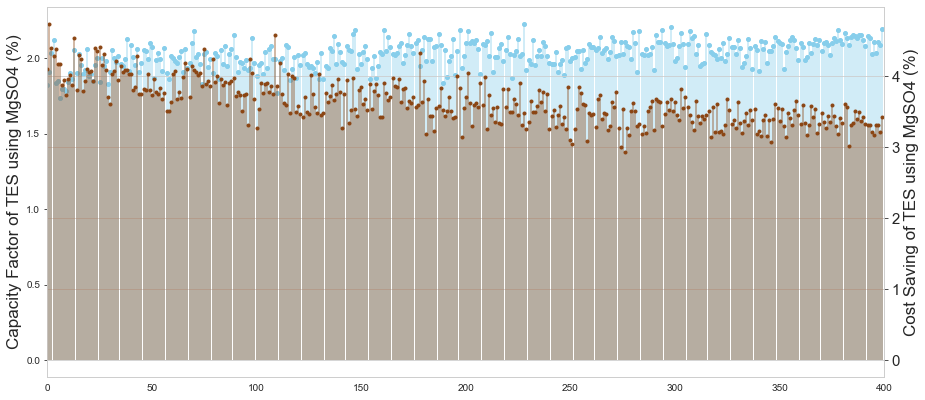

In [7]:
# Graph cost saving due to TES - MgSO4:
fig, ax1 = plt.subplots(figsize=(15,6.8))
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - MgSO4')
ordered_cost = cost_impacts_TES.sort_values(by='Load')
#ordered_cost = cost_impacts_TES.sort_values(by='Peak Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = ax1.stem(ordered_cost.index, ordered_cost['CF - MgSO4'])

plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.ylabel("Capacity Factor of TES using MgSO4 (%)", fontsize=17)

ax2 = ax1.twinx()
(markerline2, stemlines2, baseline2) = ax2.stem(ordered_cost.index, ordered_cost['cost saving % - MgSO4']*100)
plt.setp(stemlines2, color='saddlebrown', alpha=0.5)
plt.setp(markerline2, color='saddlebrown', alpha=1, markersize=3)
plt.setp(baseline2, visible=False)
plt.ylabel("Cost Saving of TES using MgSO4 (%)", fontsize=17)

plt.xlabel("Representative Building",fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(0,0.5)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_MgSO4
#cost_impacts_TES
diff_all_cost_MgSO4
ordered_cost

(0.0, 400.0)

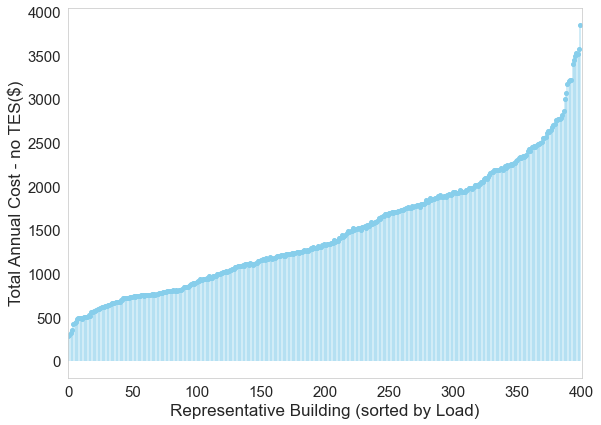

In [21]:
# Graph cost saving due to TES - MgSO4:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['total cost - no TES'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building (sorted by Load)",fontsize=17)
plt.ylabel("Total Annual Cost - no TES($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(0,110)
plt.xlim(0,400)

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,TES discharge - MgSO4,TES discharge - MgCl2,TES discharge - K2CO3,TES discharge - SrBr2,e - MgSO4,CF - MgSO4
0,304,305,279.896444,268.429684,269.637872,274.547933,277.027679,11.466760,0.040968,10.258572,...,10.421934,34.580891,15.750543,8.243389,1241.191321,1121.879407,585.642525,311.347892,7.816450,1.812696
1,233,234,302.569739,288.270172,289.917525,295.796202,298.887935,14.299567,0.047260,12.652214,...,11.860219,39.353249,17.924206,9.381024,1482.317513,1344.302601,720.434703,390.881090,8.895165,1.902318
2,210,211,318.931266,305.125019,306.844713,312.019249,315.132751,13.806246,0.043289,12.086553,...,11.618214,38.550254,17.558467,9.189606,1548.685543,1387.404376,767.304156,424.096759,8.713661,2.028890
3,338,339,351.328311,336.291599,337.933358,344.140758,347.471331,15.036712,0.042800,13.394954,...,11.896726,39.474380,17.979378,9.409899,1653.959333,1488.450070,782.835750,422.935530,8.922544,2.116080
4,364,365,421.993542,403.642557,405.838077,413.320868,416.383311,18.350985,0.043486,16.155465,...,16.313954,54.131132,24.655082,12.903774,1964.983367,1762.644284,936.629862,647.602200,12.235466,1.833303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,133,134,3492.611731,3455.969768,3398.524897,3441.147624,3465.273266,36.641963,0.010491,94.086834,...,93.962365,311.775374,142.004187,74.320982,4327.171005,11456.905242,5924.228333,3191.156111,70.471774,0.700946
396,399,400,3526.436246,3488.036408,3498.417250,3472.276440,3497.831695,38.399837,0.010889,28.018995,...,101.012317,335.167735,152.658695,79.897251,4406.970243,3214.846770,6095.680975,3257.415989,75.759238,0.664049
397,0,1,3514.231069,3475.829311,3486.128691,3460.242575,3485.537296,38.401758,0.010927,28.102377,...,98.568777,327.059854,148.965802,77.964495,4615.059527,3389.790938,6304.010566,3422.098037,73.926583,0.712644
398,4,5,3573.233625,3535.107270,3473.258017,3519.561227,3544.752200,38.126355,0.010670,99.975607,...,99.201496,329.159269,149.922022,78.464953,4539.072381,12142.694885,6215.312918,3358.734993,74.401122,0.696440


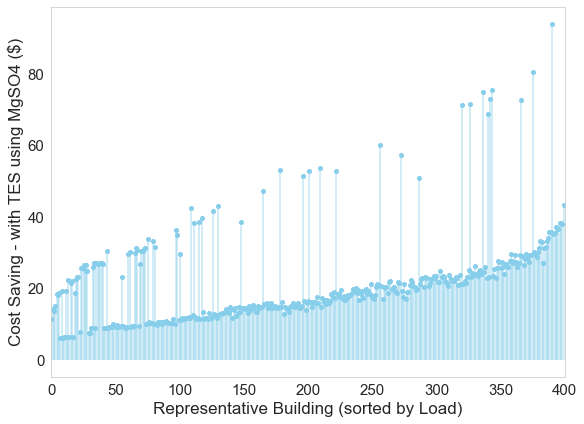

In [29]:
# Graph cost saving due to TES - MgSO4:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='Load')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving - MgSO4'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building (sorted by Load)",fontsize=17)
plt.ylabel("Cost Saving - with TES using MgSO4 ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.ylim(0,110)
plt.xlim(0,400)

In [30]:
ordered_cost

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass,TES discharge - MgSO4,TES discharge - MgCl2,TES discharge - K2CO3,TES discharge - SrBr2,e - MgSO4,CF - MgSO4
0,304,305,279.896444,268.429684,269.637872,274.547933,277.027679,11.466760,0.040968,10.258572,...,10.421934,34.580891,15.750543,8.243389,1241.191321,1121.879407,585.642525,311.347892,7.816450,1.812696
1,233,234,302.569739,288.270172,289.917525,295.796202,298.887935,14.299567,0.047260,12.652214,...,11.860219,39.353249,17.924206,9.381024,1482.317513,1344.302601,720.434703,390.881090,8.895165,1.902318
2,210,211,318.931266,305.125019,306.844713,312.019249,315.132751,13.806246,0.043289,12.086553,...,11.618214,38.550254,17.558467,9.189606,1548.685543,1387.404376,767.304156,424.096759,8.713661,2.028890
3,338,339,351.328311,336.291599,337.933358,344.140758,347.471331,15.036712,0.042800,13.394954,...,11.896726,39.474380,17.979378,9.409899,1653.959333,1488.450070,782.835750,422.935530,8.922544,2.116080
4,364,365,421.993542,403.642557,405.838077,413.320868,416.383311,18.350985,0.043486,16.155465,...,16.313954,54.131132,24.655082,12.903774,1964.983367,1762.644284,936.629862,647.602200,12.235466,1.833303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,133,134,3492.611731,3455.969768,3398.524897,3441.147624,3465.273266,36.641963,0.010491,94.086834,...,93.962365,311.775374,142.004187,74.320982,4327.171005,11456.905242,5924.228333,3191.156111,70.471774,0.700946
396,399,400,3526.436246,3488.036408,3498.417250,3472.276440,3497.831695,38.399837,0.010889,28.018995,...,101.012317,335.167735,152.658695,79.897251,4406.970243,3214.846770,6095.680975,3257.415989,75.759238,0.664049
397,0,1,3514.231069,3475.829311,3486.128691,3460.242575,3485.537296,38.401758,0.010927,28.102377,...,98.568777,327.059854,148.965802,77.964495,4615.059527,3389.790938,6304.010566,3422.098037,73.926583,0.712644
398,4,5,3573.233625,3535.107270,3473.258017,3519.561227,3544.752200,38.126355,0.010670,99.975607,...,99.201496,329.159269,149.922022,78.464953,4539.072381,12142.694885,6215.312918,3358.734993,74.401122,0.696440


,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,65,66,488.729429,469.453461,484.213032,479.957686,484.104868,19.275967,0.039441,4.516397,...,0.017948,4.624560,0.009462,4.942904,7828.670761,0.180801,17.573688,58.311038,26.558902,13.900179
1,46,47,505.295558,498.881255,500.591331,496.298315,500.493927,6.414303,0.012694,4.704226,...,0.017806,4.801630,0.009503,4.763001,8108.820994,0.194345,16.934071,56.188735,25.592257,13.394265
2,52,53,488.987185,482.568478,484.280605,479.987490,484.167370,6.418707,0.013127,4.706580,...,0.018405,4.819815,0.009857,4.928482,7858.448509,0.182020,17.522414,58.140908,26.481413,13.859624
3,365,366,519.759570,513.250132,514.993505,510.607347,513.846143,6.509438,0.012524,4.766065,...,0.017609,5.913427,0.011377,4.895633,8433.357041,0.196647,17.405625,57.753393,26.304911,13.767248
4,61,62,556.166892,537.476984,550.713484,545.821827,550.592498,18.689908,0.033605,5.453408,...,0.018601,5.574394,0.010023,5.315510,8915.638493,0.191471,18.898428,62.706642,28.560966,14.948003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,246,247,3001.959036,2967.933741,2915.129395,2954.139741,2976.504269,34.025295,0.011334,86.829642,...,0.015929,25.454767,0.008479,24.366467,49510.006709,0.231951,86.630996,287.449249,130.924378,68.522123
396,129,130,3214.653505,3179.506960,3122.482741,3165.226648,3188.421108,35.146545,0.010933,92.170764,...,0.015375,26.232396,0.008160,25.511566,53027.548896,0.237280,90.702210,300.957894,137.077154,71.742312
397,133,134,3492.611731,3455.969768,3398.524897,3441.147624,3465.273266,36.641963,0.010491,94.086834,...,0.014735,27.338465,0.007828,26.428541,57673.600182,0.249115,93.962365,311.775374,142.004187,74.320982
398,385,386,3453.076330,3416.242198,3353.464409,3401.181066,3425.611660,36.834132,0.010667,99.611922,...,0.015029,27.464670,0.007954,27.341019,56719.004778,0.236815,97.206532,322.539805,146.907057,76.887006


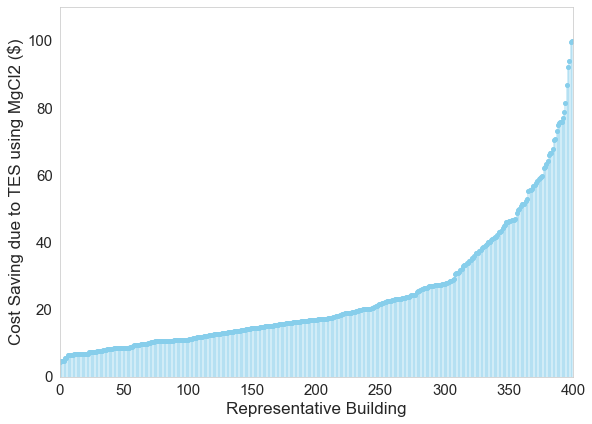

In [25]:
# Graph cost saving due to TES - MgCl2:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving - MgCl2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving - MgCl2'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using MgCl2 ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,110)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_MgCl2
#cost_impacts_TES
diff_all_cost_MgCl2
ordered_cost

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,304,305,279.896444,268.429684,269.637872,274.547933,277.027679,11.466760,0.040968,10.258572,...,0.019109,2.868765,0.010249,2.931349,4494.552000,0.175031,10.421934,34.580891,15.750543,8.243389
1,233,234,302.569739,288.270172,289.917525,295.796202,298.887935,14.299567,0.047260,12.652214,...,0.022387,3.681804,0.012168,3.335892,4804.581801,0.164414,11.860219,39.353249,17.924206,9.381024
2,210,211,318.931266,305.125019,306.844713,312.019249,315.132751,13.806246,0.043289,12.086553,...,0.021672,3.798514,0.011910,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
3,338,339,351.328311,336.291599,337.933358,344.140758,347.471331,15.036712,0.042800,13.394954,...,0.020458,3.856981,0.010978,3.346160,5666.573658,0.193317,11.896726,39.474380,17.979378,9.409899
4,99,100,439.207147,421.067838,423.490297,430.712144,434.677729,18.139309,0.041300,15.716850,...,0.019342,4.529418,0.010313,4.456120,7017.284235,0.179766,15.843009,52.568494,23.943348,12.531272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,45,46,3400.682067,3363.311784,3373.297847,3348.084766,3372.713685,37.370282,0.010989,27.384220,...,0.015467,27.968382,0.008224,26.990486,56407.352633,0.238573,95.960270,318.404597,145.023596,75.901256
396,4,5,3573.233625,3535.107270,3473.258017,3519.561227,3544.752200,38.126355,0.010670,99.975607,...,0.015021,28.481424,0.007971,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
397,0,1,3514.231069,3475.829311,3486.128691,3460.242575,3485.537296,38.401758,0.010927,28.102377,...,0.015363,28.693773,0.008165,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495
398,399,400,3526.436246,3488.036408,3498.417250,3472.276440,3497.831695,38.399837,0.010889,28.018995,...,0.015358,28.604550,0.008111,28.411462,57919.433045,0.232716,101.012317,335.167735,152.658695,79.897251


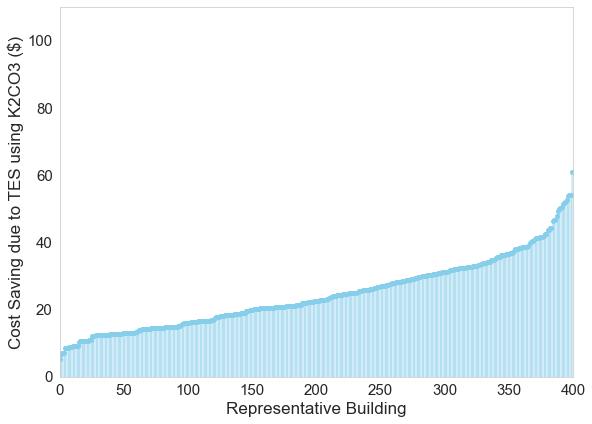

In [26]:
# Graph cost saving due to TES - K2CO3:
fig = plt.subplots(figsize=(9.2,6.8))
ordered_cost = cost_impacts_TES.sort_values(by='cost saving - K2CO3')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving - K2CO3'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using K2CO3 ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,110)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_K2CO3
#cost_impacts_TES
diff_all_cost_K2CO3
ordered_cost

,index,building id,total cost - no TES,total cost - MgSO4,total cost - MgCl2,total cost - K2CO3,total cost - SrBr2,cost saving - MgSO4,cost saving % - MgSO4,cost saving - MgCl2,...,cost saving % - K2CO3,cost saving - SrBr2,cost saving % - SrBr2,Peak Load,Load,Load Factor,MgSO4 Salt Mass,MgCl2 Salt Mass,K2CO3 Salt Mass,SrBr2 Salt Mass
0,304,305,279.896444,268.429684,269.637872,274.547933,277.027679,11.466760,0.040968,10.258572,...,0.019109,2.868765,0.010249,2.931349,4494.552000,0.175031,10.421934,34.580891,15.750543,8.243389
1,233,234,302.569739,288.270172,289.917525,295.796202,298.887935,14.299567,0.047260,12.652214,...,0.022387,3.681804,0.012168,3.335892,4804.581801,0.164414,11.860219,39.353249,17.924206,9.381024
2,210,211,318.931266,305.125019,306.844713,312.019249,315.132751,13.806246,0.043289,12.086553,...,0.021672,3.798514,0.011910,3.267824,5129.930228,0.179204,11.618214,38.550254,17.558467,9.189606
3,338,339,351.328311,336.291599,337.933358,344.140758,347.471331,15.036712,0.042800,13.394954,...,0.020458,3.856981,0.010978,3.346160,5666.573658,0.193317,11.896726,39.474380,17.979378,9.409899
4,99,100,439.207147,421.067838,423.490297,430.712144,434.677729,18.139309,0.041300,15.716850,...,0.019342,4.529418,0.010313,4.456120,7017.284235,0.179766,15.843009,52.568494,23.943348,12.531272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,45,46,3400.682067,3363.311784,3373.297847,3348.084766,3372.713685,37.370282,0.010989,27.384220,...,0.015467,27.968382,0.008224,26.990486,56407.352633,0.238573,95.960270,318.404597,145.023596,75.901256
396,4,5,3573.233625,3535.107270,3473.258017,3519.561227,3544.752200,38.126355,0.010670,99.975607,...,0.015021,28.481424,0.007971,27.902137,59150.390389,0.242000,99.201496,329.159269,149.922022,78.464953
397,399,400,3526.436246,3488.036408,3498.417250,3472.276440,3497.831695,38.399837,0.010889,28.018995,...,0.015358,28.604550,0.008111,28.411462,57919.433045,0.232716,101.012317,335.167735,152.658695,79.897251
398,0,1,3514.231069,3475.829311,3486.128691,3460.242575,3485.537296,38.401758,0.010927,28.102377,...,0.015363,28.693773,0.008165,27.724174,58015.584978,0.238881,98.568777,327.059854,148.965802,77.964495


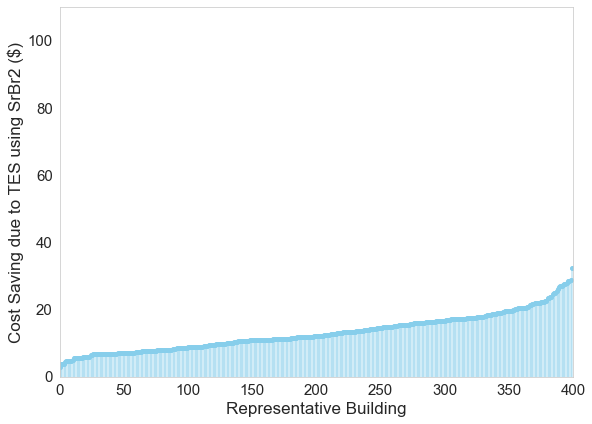

In [28]:
# Graph cost saving due to TES - SrBr2:
fig = plt.subplots(figsize=(9.2,6.8))
#ordered_cost = cost_impacts_TES.sort_values(by='cost saving % - SrBr2')
ordered_cost = cost_impacts_TES.sort_values(by='cost saving - SrBr2')
ordered_cost = ordered_cost.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['cost saving - SrBr2'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=17)
plt.ylabel("Cost Saving due to TES using SrBr2 ($)", fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,110)
plt.xlim(0,400)
#plt.axis([0, 400, 0, 7])
pct_cost_saving_SrBr2
#cost_impacts_TES
diff_all_cost_SrBr2
ordered_cost

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

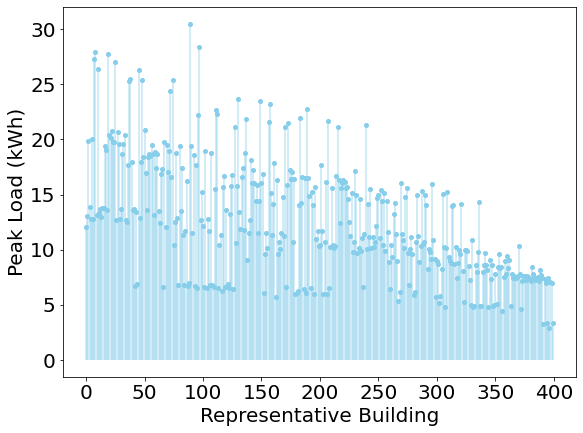

In [6]:
# Graph peak load:
fig = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_cost.index, ordered_cost['Peak Load'])
plt.grid(False)
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Peak Load (kWh)", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


,index,building id,TES discharge,load,cost saving,TES fraction of load
0,246,247,4751.886868,49510.006709,0.014096,0.095978
1,68,69,2148.190737,23405.212739,0.014239,0.091783
2,110,111,2247.644924,23817.025735,0.014387,0.094371
3,20,21,2397.666942,24162.564911,0.014513,0.099231
4,206,207,2027.953561,21586.960661,0.014814,0.093943
...,...,...,...,...,...,...
395,364,365,1710.475272,6769.214631,0.041632,0.252684
396,338,339,1714.161878,5666.573658,0.049872,0.302504
397,210,211,1602.807984,5129.930228,0.051984,0.312442
398,233,234,1531.812937,4804.581801,0.054523,0.318823


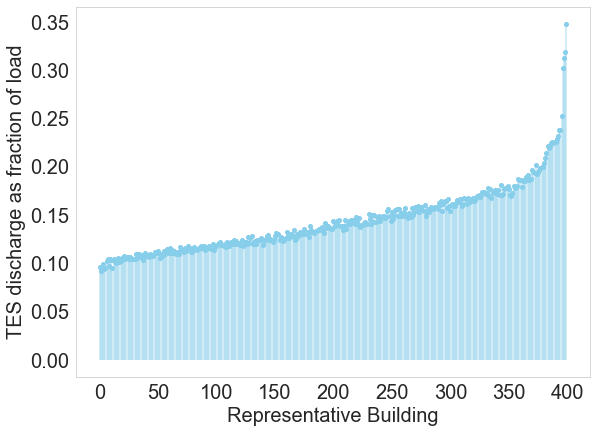

In [60]:
# Total TES discharge to serve load:
tes_discharge = pd.read_excel(ResultsFolder + "TES discharge-"+salt_type+".xlsx")
load = pd.read_excel(ResultsFolder + "load.xlsx")

ordered_tes_discharge = tes_discharge.sort_values(by='building id')
ordered_load = load.sort_values(by='building id')
ordered_tes_discharge = ordered_tes_discharge.reset_index()
ordered_load = ordered_load.reset_index()

# Find TES discharge as fraction of load:
tes_load_combined = pd.DataFrame()
tes_load_combined['building id'] = ordered_load['building id']
tes_load_combined['TES discharge'] = ordered_tes_discharge['TES discharge']
tes_load_combined['load'] = ordered_load['Load']
tes_load_combined['cost saving'] = cost_impacts_TES['cost saving %']
tes_load_combined['TES fraction of load'] = tes_load_combined['TES discharge']/tes_load_combined['load']
ordered_tes_load_combined = tes_load_combined.sort_values(by='cost saving')

# Graph TES as fraction of load
fig, ax = plt.subplots(figsize=(9.2,6.8))
ordered_tes_load_combined = ordered_tes_load_combined.reset_index()
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['TES fraction of load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("TES discharge as fraction of load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ordered_tes_load_combined

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

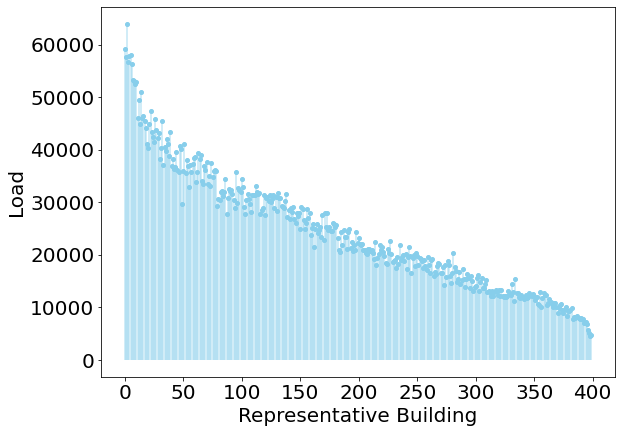

In [5]:
# Graph Load
fig, ax = plt.subplots(figsize=(9.2,6.8))
(markerline, stemlines, baseline) = plt.stem(ordered_tes_load_combined.index, ordered_tes_load_combined['load'])
plt.setp(stemlines, color='skyblue', alpha=0.5)
plt.setp(markerline, color='skyblue', alpha=1, markersize=4)
plt.setp(baseline, visible=False)
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.ylabel("Load", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

In [6]:
# HP output:
hp_noTES = pd.read_excel(ResultsFolder + "hp_output - no TES.xlsx")
hp_TES = pd.read_excel(ResultsFolder + "hp_output-"+ salt_type +".xlsx")
hp_noTES = hp_noTES.sort_values(by='building id')
hp_noTES = hp_noTES.reset_index()
hp_TES = hp_TES.sort_values(by='building id')
hp_TES = hp_TES.reset_index()
hp_TES = hp_TES.rename(columns={'HP total': 'HP total - w/TES'})
hp_noTES = hp_noTES.rename(columns={'HP to load': 'HP total - no TES'})
hp_TES['HP total - no TES'] = hp_noTES['HP total - no TES']
hp_TES['cost saving %'] = cost_impacts_TES['cost saving %']
hp_TES['delta HP'] = (hp_TES['HP total - w/TES'] - hp_TES['HP total - no TES'])/hp_TES['HP total - no TES']
hp_TES_sorted = hp_TES.sort_values(by='cost saving %')
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted = hp_TES_sorted.rename(columns={'index': 'building sorted'})
hp_TES_sorted = hp_TES_sorted.reset_index()
hp_TES_sorted

,index,level_0,building sorted,Unnamed: 0,building id,HP to load,HP to TES,HP total - w/TES,HP total - no TES,cost saving %,delta HP
0,0,4,67,0,5,36104.488742,23516.226170,59620.714912,59150.390389,0.065028,0.007951
1,1,133,171,0,134,35358.319104,22770.694977,58129.014081,57673.600182,0.065183,0.007896
2,2,287,106,0,288,38359.507282,26099.450431,64458.957713,63936.968704,0.065204,0.008164
3,3,385,305,0,386,34826.906913,22338.875373,57165.782286,56719.004778,0.065212,0.007877
4,4,399,186,0,400,35182.315767,23201.140080,58383.455847,57919.433045,0.065845,0.008012
...,...,...,...,...,...,...,...,...,...,...,...
395,395,364,388,0,365,2795.407357,4054.905381,6850.312738,6769.214631,0.154385,0.011980
396,396,338,61,0,339,2390.078871,3343.362027,5733.440898,5666.573658,0.156276,0.011800
397,397,210,183,0,211,2149.398145,3041.359269,5190.757414,5129.930228,0.160909,0.011857
398,398,304,108,0,305,1759.819627,2790.543238,4550.362865,4494.552000,0.171062,0.012417


,index,Unnamed: 0,building id,Peak Load,MgSO4 Salt Mass E,MgSO4 Salt Mass P,MgSO4 Salt Mass,MgCl2 Salt Mass E,MgCl2 Salt Mass P,MgCl2 Salt Mass,K2CO3 Salt Mass E,K2CO3 Salt Mass P,K2CO3 Salt Mass,SrBr2 Salt Mass E,SrBr2 Salt Mass P,SrBr2 Salt Mass
0,304,0,305,2.931349,5.995942,1.448295,5.995942,15.162151,34.529722,34.529722,15.868958,1.791712,15.868958,9.681521,40.751969,40.751969
1,210,0,211,3.267824,6.684185,1.614537,6.684185,16.902537,38.493211,38.493211,17.690475,1.997373,17.690475,10.792812,45.429678,45.429678
2,233,0,234,3.335892,6.823415,1.648168,6.823415,17.254614,39.295018,39.295018,18.058964,2.038978,18.058964,11.017625,46.375970,46.375970
3,338,0,339,3.346160,6.844418,1.653241,6.844418,17.307724,39.415969,39.415969,18.114550,2.045254,18.114550,11.051537,46.518717,46.518717
4,99,0,100,4.456120,9.114792,2.201641,9.114792,23.048899,52.490707,52.490707,24.123359,2.723689,24.123359,14.717462,61.949520,61.949520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,385,0,386,27.341019,55.924812,13.508409,55.924812,141.419065,322.062538,322.062538,148.011533,16.711494,148.011533,90.300614,380.098129,380.098129
396,0,0,1,27.724174,56.708539,13.697715,56.708539,143.400902,326.575900,326.575900,150.085756,16.945688,150.085756,91.566081,385.424797,385.424797
397,4,0,5,27.902137,57.072554,13.785641,57.072554,144.321400,328.672208,328.672208,151.049165,17.054463,151.049165,92.153848,387.898860,387.898860
398,399,0,400,28.411462,58.114355,14.037284,58.114355,146.955840,334.671783,334.671783,153.806413,17.365775,153.806413,93.836023,394.979557,394.979557


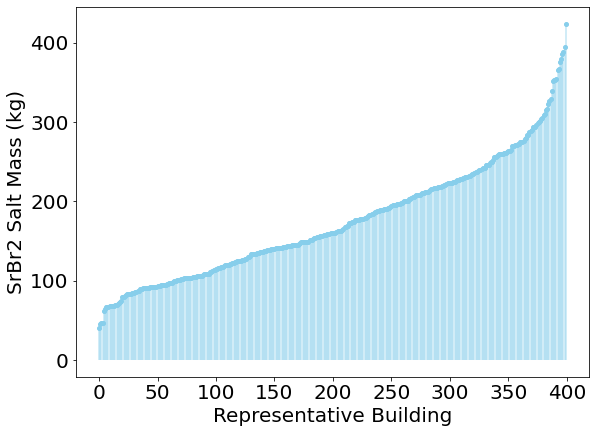

In [15]:
# HP output - no TES:
fig, ax = plt.subplots(figsize=(10,7))
plt.plot(hp_TES_sorted['index'], hp_TES_sorted['delta HP'], label = "Change in total HP output due to TES")
#plt.plot(hp_TES_sorted['index'], hp_TES_sorted['HP total - w/TES'], label = "Total HP Output - w/ TES")
plt.legend(loc='upper right')
plt.grid(False)
plt.xlabel("Representative Building",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)